## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [90]:
df = pd.read_csv('CC GENERAL.csv')

In [91]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [92]:
df = df.fillna(0)

In [93]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [94]:
df_n = df.fillna(0)
df_n.drop(['CUST_ID'], axis=1, inplace=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_n)

## K-Means

Find the optimal Kmeans model

In [97]:
from sklearn.cluster import KMeans

In [98]:
from sklearn.metrics import silhouette_score

In [125]:
ssd = []
s = []
for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_df)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    silhouette=silhouette_score(df_n,model.labels_)#,metric='euclidean')
    s.append(silhouette)

Text(0, 0.5, ' Sum of Squared Distances')

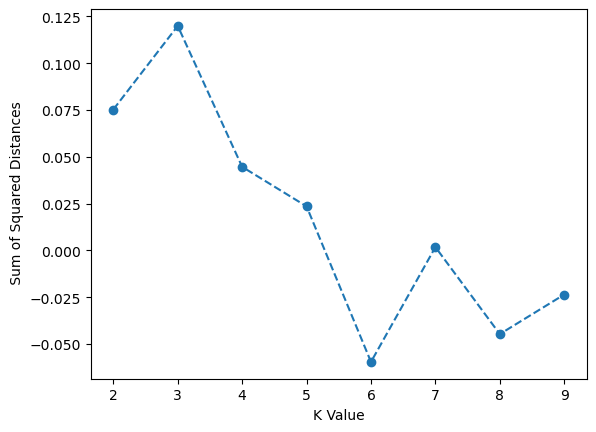

In [126]:
plt.plot(range(2,10),s,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

Text(0, 0.5, ' Sum of Squared Distances')

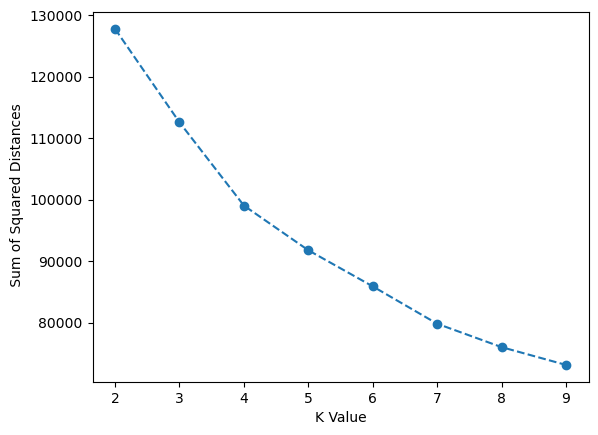

In [127]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [128]:
pd.Series(ssd).diff()

0             NaN
1   -15193.996776
2   -13534.623206
3    -7265.067624
4    -5875.380250
5    -6073.186951
6    -3805.377037
7    -2893.480057
dtype: float64

<Axes: >

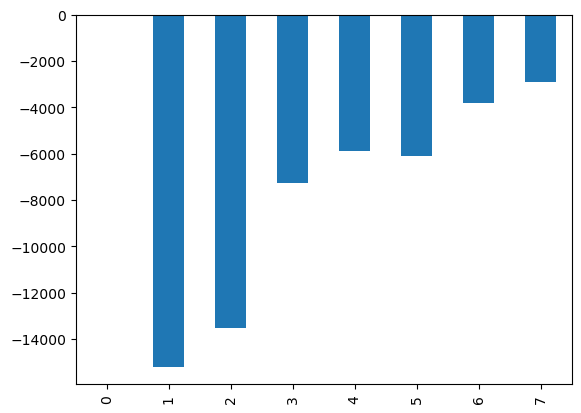

In [129]:
pd.Series(ssd).diff().plot(kind='bar')

In [130]:
model = KMeans(n_clusters=6)

In [131]:
cluster_labels = model.fit_predict(scaled_df)

In [132]:
cluster_labels

array([3, 0, 1, ..., 1, 3, 2])

In [133]:
silhouette=silhouette_score(df_n,cluster_labels)

In [134]:
silhouette

0.01277951642461962

Choose the optimal K and calculate the silhouette score for the best model.

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [138]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

s = []
linkage_list = ["average"]
metric_list = ["euclidean"]
n = np.arange(2, 10)

best = -1
best_metric = " " 
best_n = 1
best_linkage = " "

for n_clusters in n:
    for metric in metric_list:  
        for linkage in linkage_list:
            model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
            model = model.fit(scaled_df)
            silhouette = silhouette_score(scaled_df, model.labels_)
            s.append(silhouette)

            if silhouette >= best:
                best_n = n_clusters
                best = silhouette
                best_metric = metric 
                best_linkage = linkage

print(f"Best agglomerative clustering model for this data is number of clusters = {best_n} "
      f"with linkage of {best_linkage} and metric of {best_metric}. "
      f"Silhouette Score is {best}.")

Best agglomerative clustering model for this data is number of clusters = 2 with linkage of average and metric of euclidean. Silhouette Score is 0.8496939039704499.


Choose the optimal K and calculate the silhouette score for the best model.

In [140]:
model = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage = "average")

In [141]:
cluster_labels = model.fit_predict(scaled_df)
silhouette_score(df_n, cluster_labels)

0.8927154295665145

## DBSCAN

Find the optimal DBSCAN model.

In [144]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [145]:
df_n = df.fillna(0)
df_n.drop(['CUST_ID'], axis=1, inplace=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_n = scaler.fit_transform(df_n)

In [146]:
from sklearn.cluster import DBSCAN
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(scaled_n)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

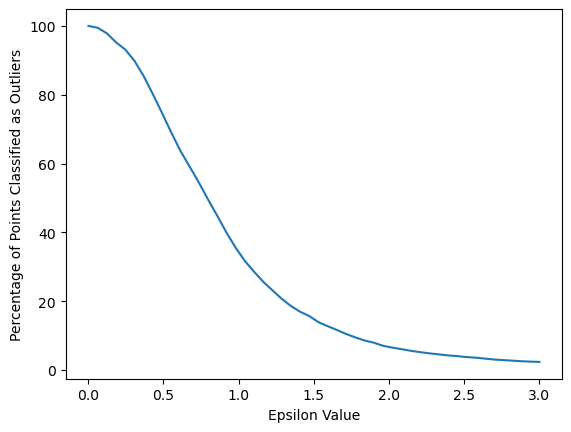

In [147]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [149]:
dbscan = DBSCAN(eps=2)
cluster_labels = dbscan.fit_predict(scaled_n)

In [150]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_n, cluster_labels)

0.3970991547619677

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?